### Developer: Mayana Mohsin Khan


# Section A: Model Complexity and Model Selection

## K-nearest neighbour (KNN) Regressor
### Loading Packages

In [13]:
# loading packages
library(reshape2)  
library(ggplot2) 
library(corrplot)

### Loading Data

In [14]:
# load the datasets
train <- read.csv('Task1A_train.csv')
train.data <- data.matrix(train[,1])

# splitting the data into predictiors and labels
train.label <- data.matrix(train[,2])
test <- read.csv('Task1A_test.csv')
test.data <- data.matrix(test[,1])
test.label <- data.matrix(test[,2])

### I. Implement a KNN Regressor

In [15]:
# Funcion to implement a knn regressor
knn <- function(train.data, train.label, test.data, K=3, distance = 'manhattan'){
    # Convert the train and test data as a matrix
    train.data <- as.matrix(train.data)
    train.label<- as.matrix(train.label)
    test.data <- as.matrix(test.data)
    
    # length of the training samples
    train.len <- nrow(train.data)
    
    ## count number of test samples
    test.len <- nrow(test.data)

    ## calculate distances between samples
    dist <- as.matrix(dist(rbind(test.data, train.data), 
                           method= distance))[1:test.len, (test.len+1):(test.len+train.len)]
    
    # if lenght of training samples is 1, transform the the distance matrix
    if(test.len == 1){
        dist <- t(dist)
    }

    # for each test sample
    for (i in 1:test.len){
        # get the index of the sample 
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
        # find nearest training samples
        y <- train.label[nn,]
        # calculate the test labels
        test.label[i] <- mean(y)
    }
    
    ## return the class test labels as output
    return (test.label)
}

### II. Plot the training and testing errors for K in 1 to 30.

* Calculate the train and test `MSE` as: $$mean(actual - prediction)^2$$

* Where actual values are: `train.label` and `test.label`
<br>

#### Prediction by calling the knn function defined above.
* Prediction for train is: `knn(train.data, train.label, train.data, K=k))^2`.
* Prediction for test is: `knn(train.data, train.label, test.data, K=k))^2`.

In [16]:
# Create a empty data frame with 'K', 'train' and 'test' as columns and 30 empty rows
miss <- data.frame('K'=1:30, 'train'=rep(0,30), 'test'=rep(0,30))

# Calculate the MSE for k in 1 to 30
for (k in 1:30){
    miss[k,'train'] <- mean((train.label - knn(train.data, train.label, train.data, K=k))^2)
    miss[k,'test'] <-  mean((test.label - knn(train.data, train.label, test.data, K=k))^2)
}

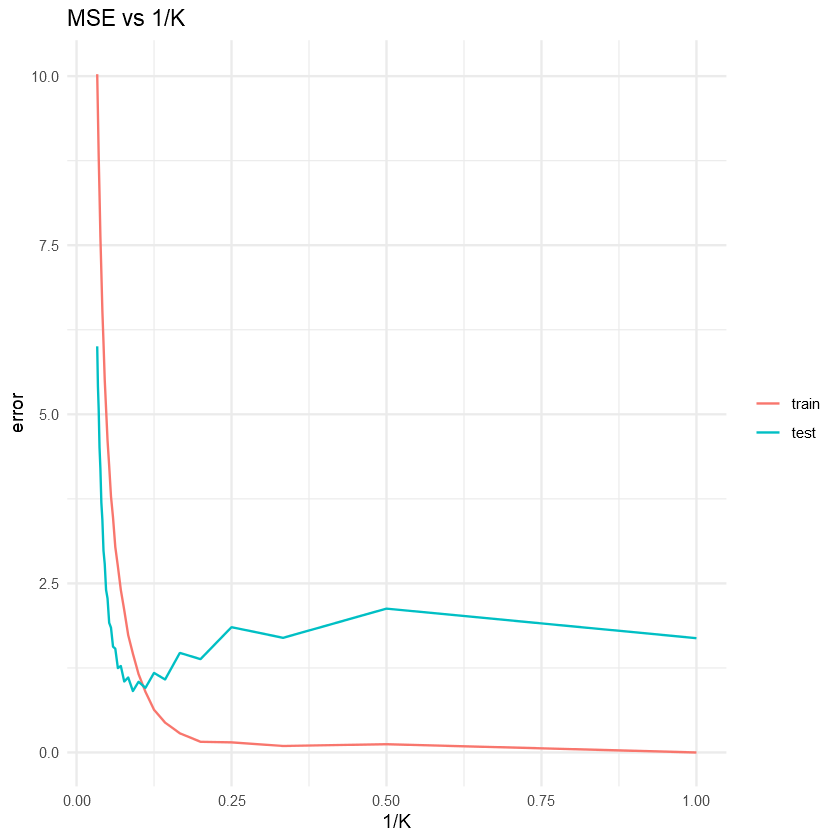

In [17]:
# pivot the miss dataframe
miss.m <- melt(miss, id='K') 

# rename the columns
names(miss.m) <- c('K', 'type', 'error')

# Plot the graph for MSE vs 1/k
ggplot(data=miss.m, aes(x= 1/K, y= error, color=type)) + geom_line() +
       scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
       ggtitle("MSE vs 1/K")

### III. Discuss the values of K and model complexity corresponding to underfitting and overfitting based on your plot in the previous part.

##### ANSWER

* It is observed from the above graph, KNN model preforms better on training samples compared to testing sample for large values of 1/k. White model preforms better on testing sample on lower values of 1/k. 

* It is observed that for the values of 1/k and errors , the model is overfitted on training data and has higher complexitiy. So, it gives out better results samples it is trained on. This maybe beacuse the model stores the training samples and gives larger error values  while predicting on the testing sample. In other words the model is biased towards training data.

* The later is true, the model is an underfit for testing samples and this is evidient when the vlue of 1/k is small and as they increase, the error rate inscreases proportionally. Thus concluding that the model has low variance towards testing data.

* The most optimal value of k is `11`. It is the smallest inverted peak when the testing error is the lowest.

* The model is neither a simple one nor a complex one and so, we need to find the sweet spot when the model is at its lowers 